# Chapter 13: The Law of Large Numbers (LLN)

## Introduction

In the previous chapters, we explored individual random variables and their distributions, as well as how multiple variables interact. Now, we venture into the fascinating realm of *limit theorems*. These theorems describe the long-term behavior of sequences of random variables, forming the theoretical bedrock for many statistical methods and simulations.

The first major limit theorem we'll explore is the **Law of Large Numbers (LLN)**. Intuitively, the LLN tells us that if we repeat an experiment independently many times, the average of the outcomes will tend to get closer and closer to the theoretical expected value of the experiment. This aligns with our everyday understanding – flip a fair coin enough times, and the proportion of heads will likely be very close to 50%. The LLN provides the mathematical justification for this intuition and is fundamental to why simulation methods, like Monte Carlo, work.

In this chapter, we will:
1.  Introduce **Chebyshev's Inequality**, a tool that provides a bound on how likely a random variable is to deviate far from its mean.
2.  Define and explain the **Weak Law of Large Numbers (WLLN)**, focusing on convergence in probability.
3.  Discuss the conceptual difference with the **Strong Law of Large Numbers (SLLN)**.
4.  Illustrate the practical implications, particularly how the LLN justifies **Monte Carlo simulations**.
5.  Use Python simulations to visualize the convergence described by the LLN.

Let's begin by looking at an inequality that helps us quantify deviations from the mean.

## Chebyshev's Inequality

Chebyshev's Inequality provides a way to estimate the probability that a random variable takes a value far from its mean, using only its mean ($\mu$) and variance ($\sigma^2$). It's powerful because it applies regardless of the specific distribution of the random variable, as long as the mean and variance are finite.

**Theorem (Chebyshev's Inequality):** Let $X$ be a random variable with finite mean $\mu = E[X]$ and finite variance $\sigma^2 = Var(X)$. Then, for any real number $\epsilon > 0$:

$$P(|X - \mu| \ge \epsilon) \le \frac{Var(X)}{\epsilon^2} = \frac{\sigma^2}{\epsilon^2}$$

Alternatively, letting $\epsilon = k\sigma$ for some $k > 0$, the inequality can be written as:

$$P(|X - \mu| \ge k\sigma) \le \frac{1}{k^2}$$

This second form states that the probability of $X$ being $k$ or more standard deviations away from its mean is at most $1/k^2$.

* For $k=2$, the probability of being 2 or more standard deviations away is at most $1/4 = 0.25$.
* For $k=3$, the probability of being 3 or more standard deviations away is at most $1/9 \approx 0.11$.

**Interpretation:** Chebyshev's inequality gives us a *guaranteed upper bound* on the probability of large deviations. This bound is often quite loose (i.e., the actual probability might be much smaller), especially if we know more about the distribution (like if it's Normal). However, its universality makes it very useful in theoretical contexts.

**Example:** Suppose the average daily return of a stock ($\mu$) is 0.05% and the standard deviation ($\sigma$) is 1%. What is the maximum probability that the return on a given day is outside the range [-1.95%, 2.05%]?
This range corresponds to being $k\sigma$ away from the mean, where $k\sigma = 2\%$, so $k = 2\% / 1\% = 2$.
Using Chebyshev's inequality with $k=2$:
$P(|X - 0.05\%| \ge 2 \times 1\%) \le \frac{1}{2^2} = \frac{1}{4} = 0.25$.
So, there's at most a 25% chance that the daily return falls outside the [-1.95%, 2.05%] range, regardless of the specific distribution shape (as long as mean and variance are as stated).

### Hands-on: Illustrating Chebyshev's Bound

Let's consider a Binomial random variable, say $X \sim Binomial(n=100, p=0.5)$.
We know $E[X] = np = 100 \times 0.5 = 50$.
And $Var(X) = np(1-p) = 100 \times 0.5 \times 0.5 = 25$, so $\sigma = \sqrt{25} = 5$.

Let's check the probability of being $k=2$ standard deviations away from the mean. That is, $P(|X - 50| \ge 2 \times 5) = P(|X - 50| \ge 10)$. This means we want $P(X \le 40 \text{ or } X \ge 60)$.

Chebyshev's inequality states: $P(|X - 50| \ge 10) \le \frac{1}{2^2} = 0.25$.

Let's calculate the actual probability using `scipy.stats`.

In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
n = 100
p = 0.5
mu = n * p
sigma = np.sqrt(n * p * (1 - p))
k = 2
epsilon = k * sigma

# Calculate the actual probability P(|X - mu| >= k*sigma)
# This is P(X <= mu - k*sigma) + P(X >= mu + k*sigma)
# Since Binomial is discrete, we need P(X <= floor(mu - k*sigma)) + P(X >= ceil(mu + k*sigma))
lower_bound = np.floor(mu - epsilon)
upper_bound = np.ceil(mu + epsilon)

prob_lower = binom.cdf(k=lower_bound, n=n, p=p)
prob_upper = 1.0 - binom.cdf(k=upper_bound - 1, n=n, p=p) # P(X >= upper_bound) = 1 - P(X < upper_bound) = 1 - P(X <= upper_bound - 1)

actual_prob = prob_lower + prob_upper

# Chebyshev bound
chebyshev_bound = 1 / (k**2)

print(f"Distribution: Binomial(n={n}, p={p})")
print(f"Mean (mu): {mu}, Standard Deviation (sigma): {sigma:.2f}")
print(f"Checking deviation of k={k} standard deviations (epsilon={epsilon:.2f})")
print(f"We want P(|X - {mu}| >= {epsilon:.2f}), which is P(X <= {lower_bound} or X >= {upper_bound})")
print(f"Actual Probability: {actual_prob:.4f}")
print(f"Chebyshev Bound: <= {chebyshev_bound:.4f}")
print(f"Is the actual probability less than or equal to the bound? {actual_prob <= chebyshev_bound}")

# Plot the distribution and the bounds
x_values = np.arange(0, n + 1)
pmf_values = binom.pmf(k=x_values, n=n, p=p)

plt.figure(figsize=(12, 6))
plt.bar(x_values, pmf_values, label='Binomial PMF', color='skyblue')
plt.axvline(mu, color='black', linestyle='--', label=f'Mean (mu={mu})')
plt.axvline(mu - epsilon, color='red', linestyle=':', label=f'mu - {k}*sigma ({mu - epsilon:.1f})')
plt.axvline(mu + epsilon, color='red', linestyle=':', label=f'mu + {k}*sigma ({mu + epsilon:.1f})')
plt.fill_between(x_values, pmf_values, where=(x_values <= lower_bound) | (x_values >= upper_bound),
                 color='red', alpha=0.5, label=f'Area where |X - mu| >= {k}*sigma')
plt.title("Binomial Distribution and Chebyshev's Bound (k=2)")
plt.xlabel("Number of Successes (X)")
plt.ylabel("Probability")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

ModuleNotFoundError: No module named 'scipy'

As we can see, the actual probability (around 0.0569) is much smaller than the Chebyshev bound (0.25). This illustrates that while the inequality always holds, it might not be very precise for specific, well-behaved distributions like the Binomial (which is close to Normal for these parameters).

## The Law of Large Numbers (LLN)

Chebyshev's inequality provides a foundation for proving one version of the Law of Large Numbers. The LLN formalizes the idea that sample averages converge to the population mean as the sample size increases.

Let $X_1, X_2, ..., X_n$ be a sequence of independent and identically distributed (i.i.d.) random variables, each with the same finite mean $\mu = E[X_i]$ and finite variance $\sigma^2 = Var(X_i)$.

Let $\bar{X}_n$ be the sample mean (average) of the first $n$ variables:
$$\bar{X}_n = \frac{X_1 + X_2 + ... + X_n}{n}$$

The LLN describes the behavior of $\bar{X}_n$ as $n \to \infty$. There are two main versions:

### 1. Weak Law of Large Numbers (WLLN)

The WLLN states that the sample mean $\bar{X}_n$ **converges in probability** to the true mean $\mu$.

**Definition (Convergence in Probability):** A sequence of random variables $Y_n$ converges in probability to a constant $c$ (written $Y_n \xrightarrow{P} c$) if, for every $\epsilon > 0$:
$$\lim_{n\to\infty} P(|Y_n - c| \ge \epsilon) = 0$$
In words: As $n$ gets larger, the probability that $Y_n$ is significantly different from $c$ becomes arbitrarily small.

**Theorem (Weak Law of Large Numbers):** If $X_1, X_2, ...$ are i.i.d. with finite mean $\mu$ and finite variance $\sigma^2$, then the sample mean $\bar{X}_n$ converges in probability to $\mu$:
$$\bar{X}_n \xrightarrow{P} \mu \quad \text{as } n \to \infty$$
That is, for any $\epsilon > 0$:
$$\lim_{n\to\infty} P(|\bar{X}_n - \mu| \ge \epsilon) = 0$$

**Proof using Chebyshev's Inequality:**
We need the properties of expected value and variance for the sample mean $\bar{X}_n$:
1.  $E[\bar{X}_n] = E\left[\frac{1}{n}\sum_{i=1}^n X_i\right] = \frac{1}{n}\sum_{i=1}^n E[X_i] = \frac{1}{n}\sum_{i=1}^n \mu = \frac{n\mu}{n} = \mu$.
    (The expected value of the sample mean is the true mean).
2.  $Var(\bar{X}_n) = Var\left(\frac{1}{n}\sum_{i=1}^n X_i\right) = \frac{1}{n^2} Var\left(\sum_{i=1}^n X_i\right)$.
    Since the $X_i$ are independent:
    $Var(\bar{X}_n) = \frac{1}{n^2} \sum_{i=1}^n Var(X_i) = \frac{1}{n^2} \sum_{i=1}^n \sigma^2 = \frac{n\sigma^2}{n^2} = \frac{\sigma^2}{n}$.
    (The variance of the sample mean decreases as $n$ increases).

Now, apply Chebyshev's Inequality to the random variable $\bar{X}_n$, which has mean $\mu$ and variance $\sigma^2/n$:
$$P(|\bar{X}_n - \mu| \ge \epsilon) \le \frac{Var(\bar{X}_n)}{\epsilon^2} = \frac{\sigma^2/n}{\epsilon^2} = \frac{\sigma^2}{n\epsilon^2}$$
Taking the limit as $n \to \infty$:
$$\lim_{n\to\infty} P(|\bar{X}_n - \mu| \ge \epsilon) \le \lim_{n\to\infty} \frac{\sigma^2}{n\epsilon^2} = 0$$
Since probability cannot be negative, the limit must be exactly 0. This proves the WLLN under the condition of finite variance. (Note: The WLLN holds even if only the mean is finite, but the proof is more complex).

**Intuition:** The WLLN tells us that for a *sufficiently large sample size n*, the probability that the sample average $\bar{X}_n$ deviates from the true mean $\mu$ by more than any small amount $\epsilon$ is very low.

### 2. Strong Law of Large Numbers (SLLN)

The SLLN makes a stronger statement about the convergence of the sample mean. It states that $\bar{X}_n$ converges **almost surely** to $\mu$.

**Definition (Almost Sure Convergence):** A sequence of random variables $Y_n$ converges almost surely to a constant $c$ (written $Y_n \xrightarrow{a.s.} c$) if:
$$P\left( \lim_{n\to\infty} Y_n = c \right) = 1$$
In words: The probability that the sequence of values $Y_n$ eventually converges to and stays at $c$ is 1. This means that for any *specific realization* (sequence of outcomes) of the random process, the sample average will converge to the true mean, except possibly for a set of outcomes with zero probability.

**Theorem (Strong Law of Large Numbers - Kolmogorov):** If $X_1, X_2, ...$ are i.i.d. with finite mean $\mu = E[X_i]$, then the sample mean $\bar{X}_n$ converges almost surely to $\mu$:
$$\bar{X}_n \xrightarrow{a.s.} \mu \quad \text{as } n \to \infty$$
$$P\left( \lim_{n\to\infty} \bar{X}_n = \mu \right) = 1$$
*(Note: The condition for the SLLN only requires finite mean, not finite variance, unlike our proof of the WLLN using Chebyshev).*

**WLLN vs SLLN:**
* WLLN concerns the probability of deviation for a *specific large n*. It doesn't guarantee that convergence will happen for a *particular sequence* of outcomes.
* SLLN concerns the behavior of the *entire sequence* of sample averages. It guarantees that the sample average will *eventually* converge to the true mean for almost every possible sequence of outcomes.

For most practical applications in simulation and statistics, the intuition provided by either law is similar: **the sample average is a reliable estimator of the true expected value for large sample sizes.**

## Applications: Justification for Monte Carlo Methods

The Law of Large Numbers is the cornerstone of **Monte Carlo simulation**. Monte Carlo methods use repeated random sampling to obtain numerical results, often when analytical solutions are intractable.

Consider estimating a probability $p$ of some event $A$. We can perform $n$ independent trials of the relevant experiment. Let $X_i$ be an indicator random variable for the $i$-th trial:
$X_i = 1$ if event $A$ occurs on trial $i$,
$X_i = 0$ if event $A$ does not occur on trial $i$.

Then $E[X_i] = 1 \cdot P(X_i=1) + 0 \cdot P(X_i=0) = P(A) = p$.
The sample mean $\bar{X}_n = \frac{1}{n}\sum_{i=1}^n X_i$ represents the proportion of times event $A$ occurred in the $n$ trials (the empirical probability).

By the LLN (either Weak or Strong), as $n \to \infty$:
$$\bar{X}_n \longrightarrow E[X_i] = p$$
So, the proportion of successes in a large number of trials converges to the true probability of success. This justifies using the observed frequency from a large simulation to estimate an unknown probability.

Similarly, if we want to estimate the expected value $E[g(Y)]$ for some random variable $Y$ and function $g$, we can generate many i.i.d. samples $Y_1, Y_2, ..., Y_n$ from the distribution of $Y$. Let $Z_i = g(Y_i)$. Then $E[Z_i] = E[g(Y)]$. The sample mean of the transformed variables is:
$$\bar{Z}_n = \frac{1}{n} \sum_{i=1}^n g(Y_i)$$
By the LLN, as $n \to \infty$:
$$\bar{Z}_n \longrightarrow E[Z_i] = E[g(Y)]$$
Thus, the average of $g(Y_i)$ over many simulations converges to the true expected value $E[g(Y)]$. This is the basis for Monte Carlo integration and estimating expected values of complex systems.

## Hands-on: Simulating the Law of Large Numbers

Let's visualize the LLN by simulating the rolling of a fair six-sided die.
The random variable $X$ is the outcome of a single roll. The sample space is $\{1, 2, 3, 4, 5, 6\}$.
The true mean (expected value) is:
$$E[X] = \sum_{k=1}^6 k \cdot P(X=k) = \sum_{k=1}^6 k \cdot \frac{1}{6} = \frac{1+2+3+4+5+6}{6} = \frac{21}{6} = 3.5$$

We will simulate $N$ die rolls, calculate the running sample average after each roll, and plot how it converges towards the theoretical mean of 3.5.

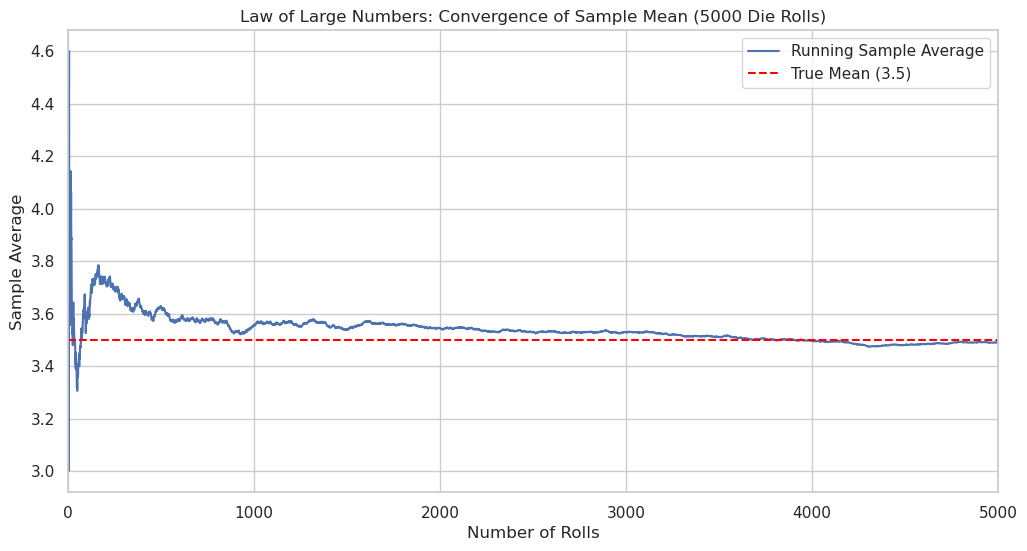

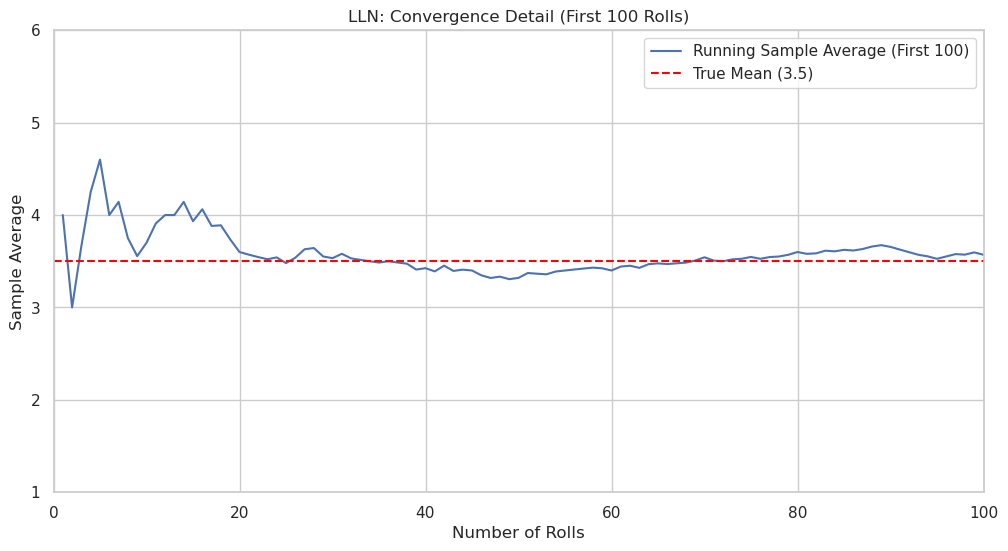

Final sample average after 5000 rolls: 3.4908
Difference from true mean: 0.0092


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Simulation Parameters ---
num_rolls = 5000  # Total number of die rolls to simulate
true_mean = 3.5   # Theoretical expected value for a fair die

# --- Simulate Die Rolls ---
# Generate random integers between 1 and 6 (inclusive)
rolls = np.random.randint(1, 7, size=num_rolls)

# --- Calculate Running Average ---
# Calculate the cumulative sum of the rolls
cumulative_sum = np.cumsum(rolls)
# Calculate the number of rolls at each step (1, 2, 3, ..., num_rolls)
roll_numbers = np.arange(1, num_rolls + 1)
# Calculate the running average: cumulative_sum / number_of_rolls
running_average = cumulative_sum / roll_numbers

# --- Plotting ---
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot the running average
plt.plot(roll_numbers, running_average, label='Running Sample Average')

# Plot the true mean
plt.axhline(true_mean, color='red', linestyle='--', label=f'True Mean ({true_mean})')

# Add annotations and labels
plt.title(f'Law of Large Numbers: Convergence of Sample Mean ({num_rolls} Die Rolls)')
plt.xlabel('Number of Rolls')
plt.ylabel('Sample Average')
plt.xlim(0, num_rolls)
# Adjust y-limits for better visualization if needed, e.g.:
# plt.ylim(1, 6)
plt.legend()
plt.grid(True)

# Optional: Show the plot for the first few rolls more clearly
plt.figure(figsize=(12, 6))
plt.plot(roll_numbers[:100], running_average[:100], label='Running Sample Average (First 100)')
plt.axhline(true_mean, color='red', linestyle='--', label=f'True Mean ({true_mean})')
plt.title('LLN: Convergence Detail (First 100 Rolls)')
plt.xlabel('Number of Rolls')
plt.ylabel('Sample Average')
plt.xlim(0, 100)
plt.ylim(1, 6) # Set fixed y-axis for fair comparison
plt.legend()
plt.grid(True)

plt.show()

print(f"Final sample average after {num_rolls} rolls: {running_average[-1]:.4f}")
print(f"Difference from true mean: {abs(running_average[-1] - true_mean):.4f}")

The plots clearly demonstrate the LLN in action. Initially, the sample average fluctuates significantly. However, as the number of rolls increases, the sample average stabilizes and gets progressively closer to the true expected value of 3.5. The final average after 5000 rolls is very close to the theoretical mean. This convergence is exactly what the LLN predicts.

## Chapter Summary

* **Chebyshev's Inequality** provides a distribution-independent upper bound on the probability that a random variable deviates from its mean by a certain amount: $P(|X - \mu| \ge \epsilon) \le \frac{\sigma^2}{\epsilon^2}$. While often loose, it's universally applicable given finite mean and variance.
* **The Law of Large Numbers (LLN)** describes the convergence of the sample average ($\bar{X}_n$) of i.i.d. random variables to the population mean ($\mu$) as the sample size ($n$) grows.
* **Weak Law of Large Numbers (WLLN):** States that $\bar{X}_n$ converges *in probability* to $\mu$. This means $P(|\bar{X}_n - \mu| \ge \epsilon) \to 0$ as $n \to \infty$. It can be proven using Chebyshev's inequality (if variance is finite).
* **Strong Law of Large Numbers (SLLN):** States that $\bar{X}_n$ converges *almost surely* to $\mu$. This means $P(\lim_{n\to\infty} \bar{X}_n = \mu) = 1$. It's a stronger condition, implying convergence for almost every specific sequence of outcomes.
* **Applications:** The LLN is the fundamental justification for **Monte Carlo methods**, ensuring that averages calculated from large simulations reliably estimate true probabilities and expected values.
* **Simulation:** We visualized the LLN by plotting the running average of simulated die rolls, observing its convergence towards the theoretical mean of 3.5.

The LLN tells us *where* the sample average converges (to the population mean). Our next topic, the Central Limit Theorem (CLT), will tell us about the *shape of the distribution* of the sample average around that mean for large sample sizes.

## Exercises

1.  **Chebyshev vs. Reality (Exponential):** Let $X \sim Exponential(\lambda=1)$. Recall $E[X] = 1/\lambda = 1$ and $Var(X) = 1/\lambda^2 = 1$.
    a. Use Chebyshev's inequality to find an upper bound for $P(|X - 1| \ge 2)$. (Here $\mu=1, \sigma=1$, so $k=2$).
    b. Calculate the exact probability $P(|X - 1| \ge 2) = P(X \ge 3)$ using the CDF of the Exponential distribution ($F(x) = 1 - e^{-\lambda x}$ for $x \ge 0$).
    c. Compare the bound from (a) with the exact value from (b).
2.  **Simulating LLN for Bernoulli:** Consider a Bernoulli trial with $p=0.3$ (probability of success). The true mean is $\mu = p = 0.3$.
    a. Simulate 10,000 Bernoulli trials with $p=0.3$.
    b. Calculate and plot the running average of the outcomes (which represents the empirical probability of success).
    c. Verify visually that the running average converges towards 0.3.
3.  **Convergence Rate:** In the proof of WLLN using Chebyshev, we found $P(|\bar{X}_n - \mu| \ge \epsilon) \le \frac{\sigma^2}{n\epsilon^2}$. If we want to ensure this probability bound is less than 0.01 for $\epsilon=0.1$, how large does $n$ need to be for the die roll example ($Var(X) = E[X^2] - (E[X])^2 = (1^2+2^2+3^2+4^2+5^2+6^2)/6 - 3.5^2 = 91/6 - 12.25 \approx 15.167 - 12.25 = 2.917$)? Does this seem like a practical sample size based on the simulation?